In [1]:
import pandas as pd
import numpy as np
import ultralytics
from ultralytics import YOLO
import torch
import os
from sklearn.model_selection import train_test_split
from PIL import Image

WARNING  Python>=3.10 is required, but Python==3.9.15 is currently installed 


In [2]:
train_df = pd.read_csv("F:\\datasets\\digits recognizer\\train.csv")
test_df = pd.read_csv("F:\\datasets\\digits recognizer\\test.csv")


In [8]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x=train_df.iloc[:,1:]
y=train_df.iloc[:,:1]
print(x.shape,y.shape)

(42000, 784) (42000, 1)


In [10]:
x=x.to_numpy().reshape(-1,28,28,1)
te=test_df.to_numpy().reshape(-1,28,28,1)
print(x.shape,te.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [11]:
yt=pd.get_dummies(y.squeeze())
y=pd.concat([y,yt],axis=1)
y.drop(columns='label',inplace=True,axis=1)
print(y.shape)

(42000, 10)


In [12]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.2,random_state=20)

In [13]:
print('Training Features Shape: ',x_t.shape)
print('Training Target Shape: ',y_t.shape)
print('Validation Features Shape: ',x_te.shape)
print('Validation Target Shape: ',y_te.shape)
print('Testing Features Shape: ',te.shape)

Training Features Shape:  (33600, 28, 28, 1)
Training Target Shape:  (33600, 10)
Validation Features Shape:  (8400, 28, 28, 1)
Validation Target Shape:  (8400, 10)
Testing Features Shape:  (28000, 28, 28, 1)


In [ ]:
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

# Loop over each image
for i in range(x_t.shape[0]):
    # Extract the image and remove the last dimension
    img = x_t[i].squeeze()  # Shape becomes (28, 28)
    
    # Convert to uint8 type if needed
    img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)
    
    # Convert to PIL Image format
    pil_img = Image.fromarray(img, mode='L')  # 'L' mode is for grayscale images
    
    # Save the image
    pil_img.save(os.path.join(output_dir, f"image_{i}.png"))

print("Images saved successfully!")

Images saved successfully!


In [21]:
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

# Loop over each image
for i in range(x_te.shape[0]):
    # Extract the image and remove the last dimension
    img = x_te[i].squeeze()  # Shape becomes (28, 28)
    
    # Convert to uint8 type if needed
    img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)
    
    # Convert to PIL Image format
    pil_img = Image.fromarray(img, mode='L')  # 'L' mode is for grayscale images
    
    # Save the image
    pil_img.save(os.path.join(output_dir, f"image_{i}.png"))

print("Images saved successfully!")

Images saved successfully!


In [ ]:

# Assuming 'y_t' might be a DataFrame instead of a NumPy array
# Example setup if needed: y_t = pd.DataFrame(np.eye(10)[np.random.randint(0, 10, 33600)])

output_dir = "labels"
os.makedirs(output_dir, exist_ok=True)

# Check the type of y_t
print("Type of y_t:", type(y_t))

# Loop through each label vector
for i in range(y_t.shape[0]):
    # Use .iloc to access rows if y_t is a DataFrame
    label_vector = y_t.iloc[i] if isinstance(y_t, pd.DataFrame) else y_t[i]
    
    # Find the class index (the position of the 1 in the one-hot encoding)
    label = np.argmax(label_vector)
    
    # Define the file path
    label_file_path = os.path.join(output_dir, f"image_{i}.txt")
    
    # Write the label to the text file
    with open(label_file_path, "w") as file:
        file.write(str(label))
    
    # Debugging statement to confirm each label is being saved
    if i < 5 or i % 5000 == 0:
        print(f"Label {label} saved to {label_file_path}")

print("All labels saved successfully!")


Type of y_t: <class 'pandas.core.frame.DataFrame'>
Label 2 saved to labels\image_0.txt
Label 9 saved to labels\image_1.txt
Label 6 saved to labels\image_2.txt
Label 9 saved to labels\image_3.txt
Label 3 saved to labels\image_4.txt
Label 6 saved to labels\image_5000.txt
Label 8 saved to labels\image_10000.txt
Label 8 saved to labels\image_15000.txt
Label 9 saved to labels\image_20000.txt
Label 2 saved to labels\image_25000.txt
Label 1 saved to labels\image_30000.txt
All labels saved successfully!


In [18]:
import os
import numpy as np
import pandas as pd

# Assuming 'y_t' might be a DataFrame instead of a NumPy array
# Example setup if needed: y_t = pd.DataFrame(np.eye(10)[np.random.randint(0, 10, 33600)])

output_dir = "labels"
os.makedirs(output_dir, exist_ok=True)

# Check the type of y_t
print("Type of y_t:", type(y_te))

# Loop through each label vector
for i in range(y_te.shape[0]):
    # Use .iloc to access rows if y_t is a DataFrame
    label_vector = y_te.iloc[i] if isinstance(y_te, pd.DataFrame) else y_te[i]
    
    # Find the class index (the position of the 1 in the one-hot encoding)
    label = np.argmax(label_vector)
    
    # Define the file path
    label_file_path = os.path.join(output_dir, f"image_{i}.txt")
    
    # Write the label to the text file
    with open(label_file_path, "w") as file:
        file.write(str(label))
    
    # Debugging statement to confirm each label is being saved
    if i < 5 or i % 5000 == 0:
        print(f"Label {label} saved to {label_file_path}")

print("All labels saved successfully!")


Type of y_t: <class 'pandas.core.frame.DataFrame'>
Label 2 saved to labels\image_0.txt
Label 6 saved to labels\image_1.txt
Label 4 saved to labels\image_2.txt
Label 8 saved to labels\image_3.txt
Label 5 saved to labels\image_4.txt
Label 0 saved to labels\image_5000.txt
All labels saved successfully!


In [38]:
print(y_t.shape)

(33600, 10)


In [15]:
print("y_t shape:", y_t.shape)
print("First 5 labels:", y_t[:5])


y_t shape: (33600, 10)
First 5 labels:        0  1  2  3  4  5  6  7  8  9
1539   0  0  1  0  0  0  0  0  0  0
23294  0  0  0  0  0  0  0  0  0  1
3974   0  0  0  0  0  0  1  0  0  0
9330   0  0  0  0  0  0  0  0  0  1
9451   0  0  0  1  0  0  0  0  0  0


In [93]:
import os

print("Model file exists:", os.path.exists("yolo11x-cls.pt"))
print("Data file exists:", os.path.exists("F:\\datasets\\digits recognizer\\data.yaml"))


Model file exists: True
Data file exists: True


In [4]:



# Load a model
model = YOLO("yolo11m-cls.pt")

# Train the model
results = model.train(data="mnist", epochs=10,batch=8, imgsz=32,device=0)


100%|██████████| 22.4M/22.4M [05:26<00:00, 71.9kB/s]


New https://pypi.org/project/ultralytics/8.3.27 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.21  Python-3.9.15 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=mnist, epochs=10, time=None, patience=100, batch=8, imgsz=32, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

100%|██████████| 5.35M/5.35M [01:28<00:00, 63.4kB/s]


AMP: checks passed 


train: Scanning D:\Microsoft VS Code\datasets\mnist\train... 60000 images, 0 corrupt: 100%|██████████| 60000/60000 [00:00<?, ?it/s]
val: Scanning D:\Microsoft VS Code\datasets\mnist\test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 32 train, 32 val
Using 8 dataloader workers
Logging results to runs\classify\train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 59.93it/s]

                   all      0.951      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 59.59it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 60.83it/s]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 59.60it/s]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 59.19it/s]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 59.52it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 59.03it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 60.60it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 60.26it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.929G     0.1612          8         32: 100%|██████████| 7500/7500 [06:46<00:00, 18.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:10<00:00, 59.25it/s]

                   all      0.989          1



10 epochs completed in 1.206 hours.
Optimizer stripped from runs\classify\train\weights\last.pt, 20.9MB
Optimizer stripped from runs\classify\train\weights\best.pt, 20.9MB

Validating runs\classify\train\weights\best.pt...
Ultralytics 8.3.21  Python-3.9.15 torch-2.5.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11m-cls summary (fused): 138 layers, 10,354,442 parameters, 0 gradients, 39.3 GFLOPs
WARNING  Dataset 'split=val' not found, using 'split=test' instead.
train: D:\Microsoft VS Code\datasets\mnist\train... found 60000 images in 10 classes  
val: None...
test: D:\Microsoft VS Code\datasets\mnist\test... found 10000 images in 10 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 625/625 [00:06<00:00, 97.55it/s] 


                   all      0.989          1
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train


In [5]:
x=test_df.to_numpy().reshape(-1,28,28,1)
print(x.shape)

(28000, 28, 28, 1)


In [6]:
images= []
for i in range(x.shape[0]):
    # Extract the image and remove the last dimension
    img = x[i].squeeze()  # Shape becomes (28, 28)
    
    # Convert to uint8 type if needed
    img = (img * 255).astype(np.uint8) if img.max() <= 1 else img.astype(np.uint8)
    
    # Convert to PIL Image format
    pil_img = Image.fromarray(img, mode='L')  # 'L' mode is for grayscale images
    
    images.append(pil_img)
    # Save the image
    #pil_img.save(os.path.join(output_dir, f"image_{i}.png"))

print("Images saved successfully!")

Images saved successfully!


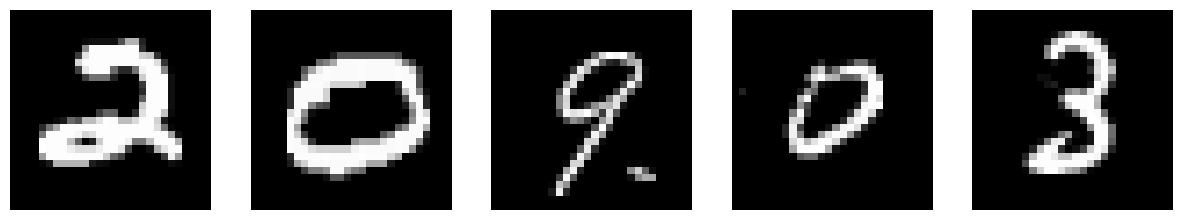

In [20]:
import matplotlib.pyplot as plt

# Display the first 5 images in a single row
plt.figure(figsize=(15, 3))  # Adjust the figure size to fit all images

for i in range(5):
    plt.subplot(1, 5, i + 1)  # Create a 1x5 grid of subplots
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")

plt.show()  # Show all images together


In [35]:
model = YOLO("F:\\datasets\\digits recognizer\\runs\\classify\\train\\weights\\best.pt")

results = model.predict(images,device = 0)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 32x32 2 1.00, 5 0.00, 3 0.00, 7 0.00, 0 0.00, 0.2ms
1: 32x32 0 0.89, 8 0.05, 9 0.02, 6 0.02, 5 0.01, 0.2ms
2: 32x32 9 0.79, 8 0.04, 4 0.04, 7 0.04, 0 0.03, 0.2ms
3: 32x32 0 0.64, 9 0.14, 8 0.09, 6 0.03, 1 0.03, 0.2ms
4: 32x32 3 0.78, 8 0.19, 6 0.01, 5 0.01, 2 0.00, 0.2ms
5: 32x32 7 0.78, 9 0.10, 4 0.03, 3 0.02, 2 0.01, 0.2ms
6: 32x32 0 1.00, 6 0.00, 9 0.00, 7 0.00, 5 0.00, 0.2ms
7: 32x32 3 1.00, 8 0.00, 9 0.00, 2 0.00, 7 0.00, 0.2ms
8: 32x32 0 0.98, 6

In [46]:
import csv
import numpy as np



# Open CSV file to save the predictions
with open("predicted_labels.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Predicted Label"])  # Header

    # Loop through each result and determine the predicted label
    for i, result in enumerate(results):
        # Access the probabilities from `data` and convert to numpy array
        probabilities = result.probs.data.cpu().numpy()  # Move to CPU and convert to numpy
        predicted_label = np.argmax(probabilities)  # Get the index of the max probability
        writer.writerow([f"Image_{i+1}", predicted_label])

print("Predicted labels saved to predicted_labels.csv")


Predicted labels saved to predicted_labels.csv


In [52]:
import csv
# Define the input and output file paths
input_file = "predicted_labels.csv"
output_file = "sample_submission.csv"


source_column = "Predicted Label" # The column from the source to copy
target_column = "Label"  # The column in the target that you want to replace

# Read the source CSV to get the values for the new column
with open(input_file, "r", newline="") as source:
    reader = csv.DictReader(source)
    source_data = [row[source_column] for row in reader]  # Get the values from the source column

# Read the existing target CSV and replace the specified column
with open(output_file, "r", newline="") as target:
    target_reader = csv.DictReader(target)
    target_data = list(target_reader)  # Store existing target data in a list

# Open the target CSV in write mode to overwrite it
with open(output_file, "w", newline="") as target:
    fieldnames = target_reader.fieldnames  # Get existing field names
    writer = csv.DictWriter(target, fieldnames=fieldnames)  # Use the same field names as the target
    writer.writeheader()  # Write the header

    # Write each row, replacing the specified target column with the source column value
    for i, row in enumerate(target_data):
        if i < len(source_data):  # Ensure we don't go out of bounds
            row[target_column] = source_data[i]  # Replace the target column value
        writer.writerow(row)

print(f"Column '{target_column}' in {output_file} replaced with '{source_column}' from {input_file}.")

Column 'Label' in sample_submission.csv replaced with 'Predicted Label' from predicted_labels.csv.
